BIG DATA: Pré-processamento de Dados

Download Dados Bolsa Família (recomendação: faça a transferência pelo menos dos últimos 6 meses)

Fonte: https://portaldatransparencia.gov.br/download-de-dados/novo-bolsa-familia

Após essa etapa, concatene em um dataframe 2 meses aleatórios dessa fonte (mês a mês).

Vamos comparar o tempo de processamento das bibliotecas Pandas e Polars:

PANDAS

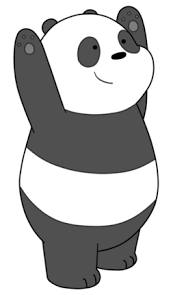

In [7]:
#IMPORTANTE: utilize os dados de 2 meses para evitar a sobrecarga do programa!

import pandas as pd
import time



In [8]:
arquivo1=pd.read_csv("202401_NovoBolsaFamilia.csv", sep=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pd.read_csv("202402_NovoBolsaFamilia.csv", sep=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_pandas=pd.concat([arquivo1,arquivo2])

display(df_pandas.head())

print("Tempo de execução com Pandas:", time.time() - inicio_tempo, "segundos") 

,MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
0,202401,202303,AC,139,RIO BRANCO,***.511.972-**,1.629112e+10,JANAINA FERREIRA DA SILVA,"800,00"
1,202401,202303,BA,3329,ANGUERA,***.909.745-**,2.047443e+10,TACIANE MARQUES DA SILVA,"750,00"
2,202401,202303,BA,3731,MONTE SANTO,***.872.338-**,2.019538e+10,MAILSON DOS SANTOS SILVA,"650,00"
3,202401,202303,BA,3761,NOVA VICOSA,***.665.905-**,1.272359e+10,IRENI RICARDO GERALDO,"650,00"
4,202401,202303,BA,3849,SALVADOR,***.932.435-**,2.002458e+10,ELIENE GOMES DOS SANTOS,"850,00"


Tempo de execução com Pandas: 5.481703042984009 segundos


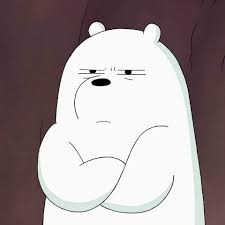

In [9]:
import polars as pl

In [10]:
arquivo1=pl.read_csv("202401_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pl.read_csv("202402_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_polars=pl.concat([arquivo1,arquivo2])

display(df_polars.head())

print("Tempo de execução com Polars:", time.time() - inicio_tempo, "segundos") 

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202401,202303,"""AC""",139,"""RIO BRANCO""","""***.511.972-**""",16291115205,"""JANAINA FERREIRA DA SILVA""","""800,00"""
202401,202303,"""BA""",3329,"""ANGUERA""","""***.909.745-**""",20474429886,"""TACIANE MARQUES DA SILVA""","""750,00"""
202401,202303,"""BA""",3731,"""MONTE SANTO""","""***.872.338-**""",20195376298,"""MAILSON DOS SANTOS SILVA""","""650,00"""
202401,202303,"""BA""",3761,"""NOVA VICOSA""","""***.665.905-**""",12723589082,"""IRENI RICARDO GERALDO""","""650,00"""
202401,202303,"""BA""",3849,"""SALVADOR""","""***.932.435-**""",20024584007,"""ELIENE GOMES DOS SANTOS""","""850,00"""


Tempo de execução com Polars: 2.6673412322998047 segundos


In [11]:
import pandas as pd
import polars as pl
import time

In [12]:
#Exportação para .parquet com Pandas:

inicio_tempo=time.time()
parquet1=df_pandas.to_parquet=("202401_NovoBolsaFamilia_pandas.parquet")
print("Tempo de exportação com Pandas:", time.time() - inicio_tempo, "segundos")
print(parquet1)

Tempo de exportação com Pandas: 0.0 segundos
202401_NovoBolsaFamilia_pandas.parquet


In [13]:
#Exportação para .parquet com Polars:

inicio_tempo=time.time()
parquet2=df_polars.write_parquet=("202401_NovoBolsaFamilia_polars.parquet")
print("Tempo de exportação com Polars:", time.time() - inicio_tempo, "segundos") 
print(parquet2)

Tempo de exportação com Polars: 0.0010013580322265625 segundos
202401_NovoBolsaFamilia_polars.parquet


In [14]:
import pyarrow 
import fastparquet

In [23]:



arquivo1=pl.read_csv("202401_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pl.read_csv("202402_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_polars=pl.concat([arquivo1,arquivo2])

display(df_polars.head())

print("Tempo de execução com Polars:", time.time() - inicio_tempo, "segundos") 

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202401,202303,"""AC""",139,"""RIO BRANCO""","""***.511.972-**""",16291115205,"""JANAINA FERREIRA DA SILVA""","""800,00"""
202401,202303,"""BA""",3329,"""ANGUERA""","""***.909.745-**""",20474429886,"""TACIANE MARQUES DA SILVA""","""750,00"""
202401,202303,"""BA""",3731,"""MONTE SANTO""","""***.872.338-**""",20195376298,"""MAILSON DOS SANTOS SILVA""","""650,00"""
202401,202303,"""BA""",3761,"""NOVA VICOSA""","""***.665.905-**""",12723589082,"""IRENI RICARDO GERALDO""","""650,00"""
202401,202303,"""BA""",3849,"""SALVADOR""","""***.932.435-**""",20024584007,"""ELIENE GOMES DOS SANTOS""","""850,00"""


Tempo de execução com Polars: 1.249995231628418 segundos


In [25]:
df_polars.write_parquet('bimestre1.parquet')

In [26]:
arquivo1=pl.read_csv("202403_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pl.read_csv("202404_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_polars=pl.concat([arquivo1,arquivo2])

display(df_polars.head())

print("Tempo de execução com Polars:", time.time() - inicio_tempo, "segundos") 

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202403,202303,"""PA""",581,"""CURIONOPOLIS""","""***.427.552-**""",16158471934,"""ANDRESSA SOUSA COSTA""","""325,00"""
202403,202303,"""PA""",581,"""CURIONOPOLIS""","""***.268.842-**""",21204955249,"""DIVINA NERES DA SILVA""","""350,00"""
202403,202304,"""AM""",221,"""CARAUARI""","""***.462.652-**""",20149917044,"""ELIAS GREGORIO SIMOES""","""600,00"""
202403,202304,"""BA""",3449,"""CATU""","""***.335.635-**""",16104664114,"""ADRIANA MIRANDA DE JESUS""","""800,00"""
202403,202304,"""BA""",3449,"""CATU""","""***.288.245-**""",12611273067,"""EDMILSON DE JESUS MENDES""","""600,00"""


Tempo de execução com Polars: 2.571810245513916 segundos


In [18]:
df_polars.write_parquet('bimestre2.parquet')

In [19]:
arquivo1=pl.read_csv("202405_NovoBolsaFamilia.csv", separator=";", encoding="latin-1") #caminhos dos arquivos
arquivo2=pl.read_csv("202406_NovoBolsaFamilia.csv", separator=";", encoding="latin-1")

inicio_tempo=time.time() #marcação do tempo de processamento
df_polars=pl.concat([arquivo1,arquivo2])

display(df_polars.head())

print("Tempo de execução com Polars:", time.time() - inicio_tempo, "segundos") 

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202405,202303,"""RJ""",6001,"""RIO DE JANEIRO""","""""",12789600971,"""DYANNA MARIA DA SILVA RABELO""","""750,00"""
202405,202304,"""RJ""",6001,"""RIO DE JANEIRO""","""***.520.517-**""",16662994112,"""RIVICA SOARES BARBOSA""","""750,00"""
202405,202305,"""BA""",3597,"""ITABUNA""","""***.554.805-**""",20740034450,"""ANDREA PEREIRA DOS SANTOS""","""350,00"""
202405,202305,"""BA""",3597,"""ITABUNA""","""***.332.675-**""",16014198572,"""DINALVA DA CRUZ""","""300,00"""
202405,202305,"""BA""",3597,"""ITABUNA""","""""",20724192861,"""REGIANE JESUS DO ESPIRITO SANT…","""325,00"""


Tempo de execução com Polars: 1.905109167098999 segundos


In [3]:
df_polars.write_parquet('bimestre3.parquet')

NameError: name 'df_polars' is not defined

Por fim, concatenamos todos os bimestre que já sofrem processo de compressão:

In [27]:
#Arquivo Final
parquet1=pl.read_parquet('bimestre1.parquet')
parquet2=pl.read_parquet('bimestre2.parquet')
parquet3=pl.read_parquet('bimestre3.parquet')  

bolsa_familia=pl.concat([parquet1,parquet2,parquet3])

bolsa_familia.write_parquet('bolsa_familia_final.parquet')

**LAZY EVALUATION:**
      Otimiza o processamento dos dados  volumosos, adiando operações até momentos que realmente são necessários.

In [38]:
import polars as pl 
#CARREGANDO O ARQUIVO .PARQUET ATRAVÉS DO LAZY EVOLUTION:
df_lazy=pl.scan_parquet('bolsa_familia_final.parquet')

#Definindo as operações que serão executadas apenas em momentos oportunos:
resultado=(df_lazy.filter(pl.col("NOME MUNICÍPIO")=="RIO DE JANEIRO").collect())


 


In [39]:
display(resultado)

MÊS COMPETÊNCIA,MÊS REFERÊNCIA,UF,CÓDIGO MUNICÍPIO SIAFI,NOME MUNICÍPIO,CPF FAVORECIDO,NIS FAVORECIDO,NOME FAVORECIDO,VALOR PARCELA
i64,i64,str,i64,str,str,i64,str,str
202401,202303,"""RJ""",6001,"""RIO DE JANEIRO""","""***.020.557-**""",16662936511,"""NATHALIA IATH DE ARAUJO SILVA""","""750,00"""
202401,202303,"""RJ""",6001,"""RIO DE JANEIRO""","""***.822.577-**""",16620773428,"""VANESSA RODRIGUES DO AMPARO""","""800,00"""
202401,202304,"""RJ""",6001,"""RIO DE JANEIRO""","""***.020.557-**""",16662936511,"""NATHALIA IATH DE ARAUJO SILVA""","""750,00"""
202401,202304,"""RJ""",6001,"""RIO DE JANEIRO""","""***.822.577-**""",16620773428,"""VANESSA RODRIGUES DO AMPARO""","""800,00"""
202401,202305,"""RJ""",6001,"""RIO DE JANEIRO""","""***.020.557-**""",16662936511,"""NATHALIA IATH DE ARAUJO SILVA""","""750,00"""
…,…,…,…,…,…,…,…,…
202406,202406,"""RJ""",6001,"""RIO DE JANEIRO""","""""",21425190369,"""ZULMIRA PIMENTEL BRASIL""","""650,00"""
202406,202406,"""RJ""",6001,"""RIO DE JANEIRO""","""***.043.637-**""",23606741320,"""ZULMIRA ROSA NOGUEIRA LOPES""","""440,00"""
202406,202406,"""RJ""",6001,"""RIO DE JANEIRO""","""***.963.237-**""",12288562597,"""ZUMILDO BATISTA DOS SANTOS""","""650,00"""


**MONITORAMENTO DE RECURSOS**

A blibioteca *psutil* permite verificar condições como consumo de memória e cpu 

In [1]:
import psutil

processo=psutil.Process()
print('Uso de CPU:', processo.cpu_percent(),'%')
print('Uso de Memória:',processo.memory_info().rss/(1024**2),'MB')

Uso de CPU: 0.0 %
Uso de Memória: 63.203125 MB
